In [2]:
import uproot
import uproot_methods
import awkward
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# QCD NSJ

In [3]:
T = uproot.open("../../data/ml/qcd_flat15to7000_nsj.root")["T"]

qcd = T.arrays(['jet_pt', 'jet_eta', 'jet_phi','jet_m'])

jet_pt = qcd[b'jet_pt']
jet_eta = qcd[b'jet_eta']
jet_phi = qcd[b'jet_phi']
jet_m = qcd[b'jet_m']

In [4]:
jet = uproot_methods.TLorentzVectorArray.from_ptetaphim(jet_pt, jet_eta, jet_phi, jet_m)

## PT

In [5]:
pt = jet.pt.flatten()

In [6]:
pt_bins = np.linspace(0,3000, 100)
pt_bins = np.append(pt_bins, np.array([3250, 3500, 3750]))

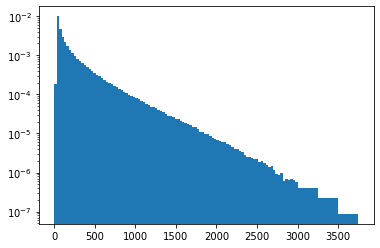

In [7]:
pt_y,pt_x, _ = plt.hist(x=pt, bins = pt_bins, log=True, density=True)
plt.show()

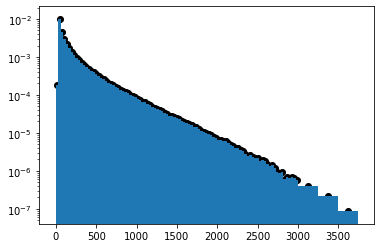

In [8]:
pt_bin_centers = pt_x[1:] - (pt_x[1:] - pt_x[:-1])/2

plt.hist(x=pt, bins = pt_bins, log=True, density=True)
plt.scatter(pt_bin_centers, pt_y, color="black")
plt.show()

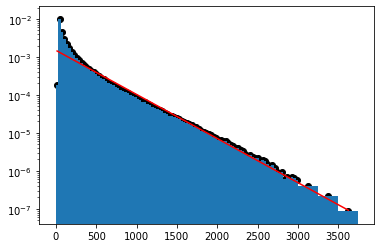

In [9]:
log_pt_y = np.log(pt_y)

pt_exp_fit = np.polyfit(pt_bin_centers, log_pt_y, 1)
pt_exp_fit_line = np.exp(pt_exp_fit[1]) * np.exp(pt_exp_fit[0] * pt_bin_centers)

plt.hist(x=pt, bins = pt_bins, log=True, density=True)
plt.scatter(pt_bin_centers, pt_y, color="black")
plt.plot(pt_bin_centers, pt_exp_fit_line , color= "Red")
plt.show()

In [10]:
print("Fit of pt is f(x) = " + str(np.exp(pt_exp_fit[1]))+ " * e^(" + str(pt_exp_fit[0]) + "x)")

Fit of pt is f(x) = 0.0014937614310891096 * e^(-0.00267537092663224x)


## Mass

In [11]:
mass = jet.mass.flatten()

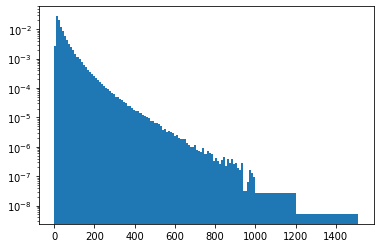

In [14]:
mass_bins = np.linspace(0,1000,100)
mass_bins = np.append(mass_bins, np.array([1200, mass.max()]))

mass_y, mass_x, _ = plt.hist(x=mass, bins= mass_bins, log=True, density=True)
plt.show()

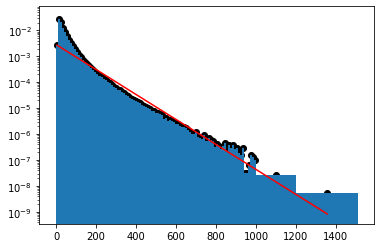

In [17]:
mass_bin_centers = mass_x[1:] - (mass_x[1:] - mass_x[:-1])/2

log_mass_y = np.log(mass_y)

mass_exp_fit = np.polyfit(mass_bin_centers, log_mass_y, 1)
mass_exp_fit_line = np.exp(mass_exp_fit[1]) * np.exp(mass_exp_fit[0] * mass_bin_centers)

plt.hist(x=mass, bins = mass_bins, log=True, density=True)
plt.scatter(mass_bin_centers, mass_y, color="black")
plt.plot(mass_bin_centers, mass_exp_fit_line , color= "Red")
plt.show()

In [28]:
print("Fit of pt is f(x) = " + str(np.exp(mass_exp_fit[1]))+ " * e^(" + str(mass_exp_fit[0]) + "x)")

Fit of pt is f(x) = 0.002850030253431098 * e^(-0.011082599264476169x)


## Eta

In [18]:
eta = jet.eta.flatten()

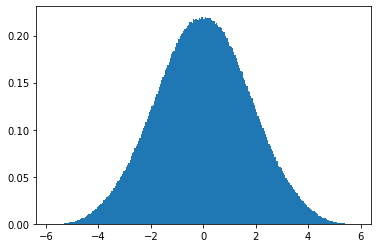

In [19]:

eta_y, eta_x, _ = plt.hist(x=eta, bins = 250, log=False, density=True)
plt.show()

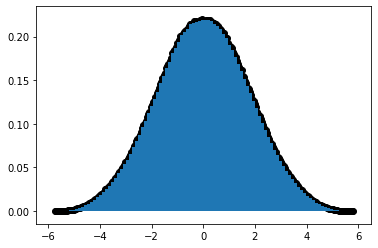

In [20]:
eta_bin_centers = eta_x[1:] - (eta_x[1:] - eta_x[:-1])/2

plt.hist(x=eta, bins = 100, log=False, density=True)
plt.scatter(eta_bin_centers, eta_y, color="black")
plt.show()

In [21]:
def gauss(x, amp, sigma, mean):
    
    return   amp / (sigma* np.sqrt(2 * np.pi )) * np.exp(- (x - mean)**2 / (2 * sigma**2)) 

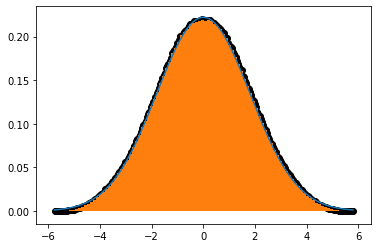

In [22]:
eta_popt, eta_pcov = curve_fit(gauss, eta_bin_centers, eta_y,  p0=[1,1,0])

plt.plot(eta_bin_centers, gauss(eta_bin_centers, eta_popt[0], eta_popt[1], eta_popt[2], ))
plt.hist(x=eta, bins = 100, log=False, density=True)
plt.scatter(eta_bin_centers, eta_y, color="black")
plt.show()

In [23]:
eta_popt

array([1.0082455 , 1.81126838, 0.00191302])

In [24]:
print("Amplitude: " + str(eta_popt[0]))
print("Sigma: " + str(eta_popt[1]))
print("Mean: " + str(eta_popt[2]))

Amplitude: 1.0082454998811992
Sigma: 1.8112683767007953
Mean: 0.0019130219482443164


## Phi


In [25]:
phi = jet.phi.flatten()

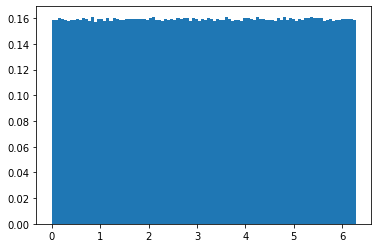

In [26]:
phi_y, phi_x, _ = plt.hist(x=phi, bins = 100, log=False, density=True)
plt.show()

In [27]:
print("phi ranges from " +str(phi_y.min()) + " to " + str(phi_y.max()))

phi ranges from 0.15702638227947613 to 0.16118728268237736
